<a href="https://colab.research.google.com/github/JarnovdKolk/Test/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### I used the pre-trained EfficientNetV2B0 model from TensorFlow's Keras Applications, excluding the top layers, and added a custom classification head for the Galaxy Zoo task. The base model was frozen during the initial training phase, and only the final layer was trained. Data augmentation was applied to the input images to improve generalization. A learning rate scheduler (ReduceLROnPlateau) was used to adjust the learning rate based on validation loss.

 Note: The model could not be properly trained on a large dataset due to GPU usage limits in Google Colab (Apparently after using the GPU for some time you run into a limit). As a result, only a small dataset was used, so the accuracy is not accurate. However, the fine-tuning concept remains the same and would be applicable with a larger dataset.

In [ ]:
!pip install torch torchvision timm pandas pillow scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths (update these to match your Google Drive paths)
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/images_training_rev1GOED"  # Path to images
LABELS_CSV = "/content/drive/MyDrive/Colab Notebooks/training_solutions_rev1GOED.csv"

NUM_CLASSES = 37  # Number of output classes for Galaxy Zoo


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define paths
DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/images_training_rev1GOED"  # Path to images
LABELS_CSV = "/content/drive/MyDrive/Colab Notebooks/training_solutions_rev1GOED.csv"

# Number of images to use
NUM_IMAGES = 10

# Load all image filenames
image_filenames = sorted(os.listdir(DATA_DIR))[:NUM_IMAGES]  # Get first NUM_IMAGES image filenames
image_ids = [int(img_name.split('.')[0]) for img_name in image_filenames]  # Extract GalaxyIDs from filenames

# Load the labels CSV
labels_df = pd.read_csv(LABELS_CSV)

# Filter labels to only include those corresponding to the images
labels_df = labels_df[labels_df['GalaxyID'].isin(image_ids)]

# Sort labels by GalaxyID to match the order of images
labels_df = labels_df.set_index('GalaxyID').loc[image_ids].reset_index()

# Load and preprocess images
images = []
for img_name in image_filenames:
    img_path = os.path.join(DATA_DIR, img_name)
    try:
        img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224
        img_array = image.img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    except Exception as e:
        print(f"Skipping {img_name} due to error: {e}")

# Convert images to a numpy array
images = np.array(images)

# Extract labels (drop the 'GalaxyID' column)
labels = labels_df.drop(columns=['GalaxyID']).values

# Verify shapes
print("Images shape:", images.shape)  # Should be (NUM_IMAGES, 224, 224, 3)
print("Labels shape:", labels.shape)  # Should be (NUM_IMAGES, 37)


Images shape: (10, 224, 224, 3)
Labels shape: (10, 37)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.1333 - loss: 16.1606 - val_accuracy: 0.0000e+00 - val_loss: 29.9559 - learning_rate: 0.0100
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.0000e+00 - loss: 20.2906 - val_accuracy: 0.0000e+00 - val_loss: 31.2782 - learning_rate: 0.0100
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.0000e+00 - loss: 26.9685 - val_accuracy: 0.5000 - val_loss: 31.8447 - learning_rate: 0.0100
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.1667 - loss: 50.5967
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.1833 - loss: 48.6688 - val_accuracy: 0.5000 - val_loss: 42.8766 - learning_rate: 0.0100
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.0500 - loss: 22.2454 - val_accuracy: 0.5000 - val_loss: 51.1203 - learning_rate: 0.0050
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step - accuracy: 0.1333 - loss: 

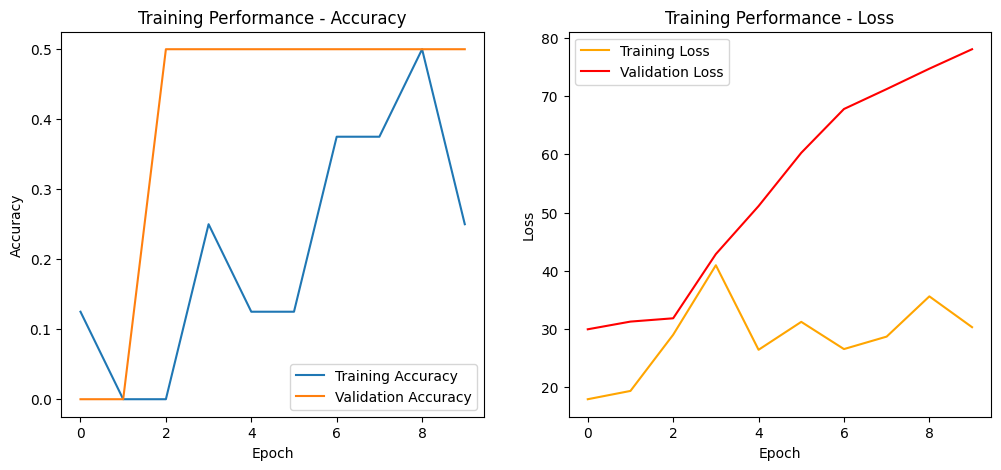

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

# Data Augmentation
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Load EfficientNetV2 without top layers (keep all base layers frozen)
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Add custom classification head (only train this part)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)  # Stabilizes training
x = Dropout(0.3)(x)  # Dropout for regularization
x = Dense(37, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile model with higher learning rate for final layer
model.compile(optimizer=Adam(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6)

from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train the model using the training and validation data
history = model.fit(augmentor.flow(X_train, y_train, batch_size=2),
                    epochs=10, validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler])

# Evaluate model
loss, accuracy = model.evaluate(images, labels)
print(f"Final Loss: {loss}, Final Accuracy: {accuracy}")

# Plot training history
def plot_training(history, title="Training Performance"):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='orange')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title(title + ' - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training(history, "Training Performance")
